In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("user_interactions.csv")
df1

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391
...,...,...,...
4995,User_3045,Checkout Page,284
4996,User_1583,Cart Page,322
4997,User_2627,Checkout Page,559
4998,User_4976,Product Page,373


In [5]:
#check for missing value
print(df1.isnull().sum())


User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64


In [12]:
#check for outliers
print(df1['Page_Viewed'].describe())

count         5000
unique           5
top       Homepage
freq          1045
Name: Page_Viewed, dtype: object


In [20]:
# Fix any data quality issues
print(df1['Page_Viewed'].replace(to_replace=-1, value=0, inplace=True))

None


In [45]:
#Analyze user behavior

most_visited_pages = df1['Page_Viewed'].value_counts().head(10)
print(most_visited_pages)

Page_Viewed
Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: count, dtype: int64


In [22]:
Avg_time_spent_on_page = df1['Time_Spent_Seconds'].mean()
print(Avg_time_spent_on_page)

304.5088


In [24]:
df2 = pd.read_csv('purchase_data.csv')
df2

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23
...,...,...,...,...,...
995,Purchase_489,User_2879,Product_14,47.047885,2023-04-10 17:38:54
996,Purchase_741,User_588,Product_1,85.587089,2023-02-19 15:05:57
997,Purchase_587,User_3821,Product_16,162.919467,2023-07-14 23:15:18
998,Purchase_222,User_1804,Product_10,44.435545,2023-03-03 15:37:35


In [58]:
#Purchase analysis
Conversion_rate = (df2['Transaction_Amount'].sum()/ df1['Page_Viewed'].count())
print(Conversion_rate ,"%")

21.26974870093248 %


In [48]:
Top_selling_products = df2['Product_ID'].value_counts().head(10)
print(Top_selling_products)

Product_ID
Product_19    66
Product_13    59
Product_4     58
Product_20    58
Product_7     56
Product_3     56
Product_17    56
Product_12    55
Product_15    51
Product_5     49
Name: count, dtype: int64


In [52]:
#cohort analysis
Cohort_analysis = df2.groupby('Purchase_Time')['Transaction_Amount'].sum()
print(Cohort_analysis)

Purchase_Time
2023-01-01 14:17:21    135.854417
2023-01-01 15:23:37    157.522460
2023-01-01 22:08:04    196.253073
2023-01-02 03:03:25     20.995437
2023-01-02 12:43:07     65.055937
                          ...    
2023-07-28 02:36:01    184.290431
2023-07-28 17:22:37    136.615615
2023-07-28 18:55:29    156.422763
2023-07-28 19:15:58     69.193960
2023-07-29 07:42:50     88.898143
Name: Transaction_Amount, Length: 1000, dtype: float64


In [53]:
df3 = pd.read_csv("website_performance.csv")
df3

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525
5,2023-06-01,7.333456,0.440715,0.048687
6,2023-07-01,3.372264,0.390081,0.048440
7,2023-08-01,7.115272,0.489165,0.038263
8,2023-09-01,8.384957,0.301692,0.063365
9,2023-10-01,2.468395,0.566843,0.065971


In [57]:
bounce_rate = (df3['Bounce_Rate'].sum() /df1['Page_Viewed'].count())*100
print(bounce_rate,"%")

0.10863607571107275 %


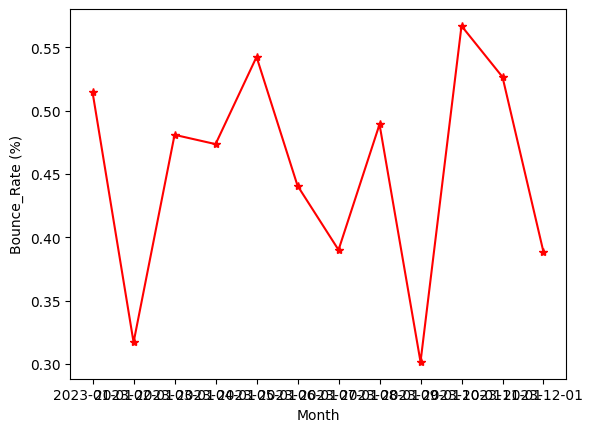

In [73]:
# Create a visualization dashboard
# Creating a line chart to visualize the bounce rate
plt.plot(df3.Month, df3.Bounce_Rate,'r*-')
plt.xlabel('Month')
plt.ylabel('Bounce_Rate (%)')
plt.show()

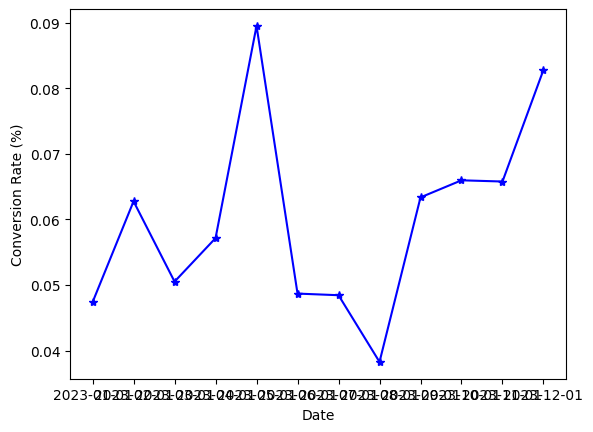

In [75]:
# Create a line chart to visualize the conversion rate
plt.plot(df3.Month, df3.Conversion_Rate,'b*-')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.show()